### Project: Investigate a Dataset - [No-Show Appointment]

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

**Description of all features and the data itself is here**

Some of them:

* **ScheduledDay** tells us on what day the patient set up their appointment.
* **Neighborhood** indicates the location of the hospital.
* **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Questions to answer from the data:

1. What is the most days for showing up and No-showing up?
2. Is there any relationship between showing up and the gender?
3. Is there any relationship between showing up and the Age?
4. Do Receiving messages have an effect on comming to the appointment?
5. What is the relation between diseases and showing up?
6. Does Enroll in the Brasilian welfare program Bolsa Família affects showing up?
7. Which hospital do patients visit most?

In [101]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

### Data Wrangling

In [102]:
df = pd.read_csv('noshowappointments.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [103]:
df.shape

(110527, 14)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [105]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [106]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The average age is 37
The oldest patients is 115

There are few patients with Hypertension, Diabetes, alcohol and Handicap.

In [107]:
df.isnull().sum()
# No null value in the dataset

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [108]:
# Function to plot charts
def Chart_Bars(label1, height1, label2, height2, col1='g', col2='r', Title='Title', yLabel='Number of patients', xLabel=''):
  
    sns.set()
    fig, ax = plt.subplots()
    ax.bar(label1, height1, label=label1, color=col1)
    ax.bar(label2, height2, label=label2, color=col2)
    ax.set_title(Title, fontweight='bold')
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    ax.legend()

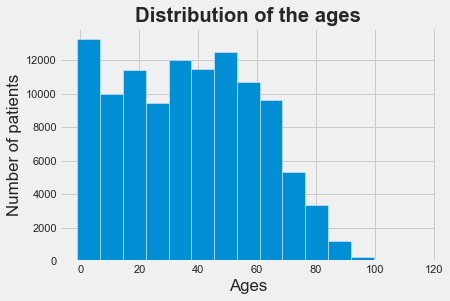

In [109]:
fig, ax = plt.subplots()
ax.hist(df['Age'], bins=15)
ax.set_xlabel("Ages")
ax.set_title('Distribution of the ages', fontweight='bold');
ax.set_ylabel('Number of patients');

In [110]:
genderVar = df['Gender'].value_counts()
genderVar

F    71840
M    38687
Name: Gender, dtype: int64

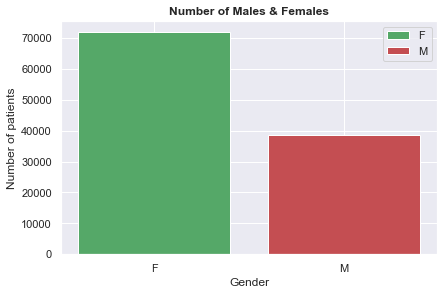

In [111]:
Chart_Bars(label1=genderVar.index[0], height1=genderVar.values[0], label2=genderVar.index[1], height2=genderVar.values[1], Title= 'Number of Males & Females', xLabel='Gender')


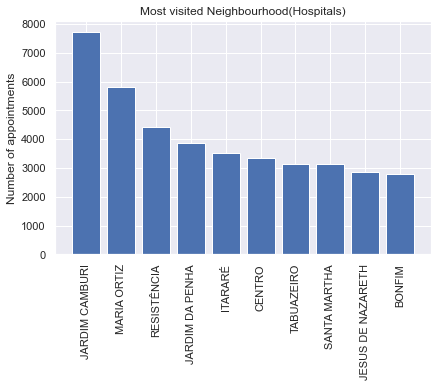

In [112]:
df['Neighbourhood'].value_counts()[0:10]
most_visited_neighbourhood = df.Neighbourhood.value_counts()[0: 10]
names = most_visited_neighbourhood.index

sns.set()
fig, ax = plt.subplots()
ax.bar(most_visited_neighbourhood.index, most_visited_neighbourhood.values);
plt.xticks(rotation=90);
ax.set_title('Most visited Neighbourhood(Hospitals)')
ax.set_ylabel('Number of appointments')
plt.show()


In [113]:
scholar_value = df['Scholarship'].value_counts()
scholar_value

0    99666
1    10861
Name: Scholarship, dtype: int64

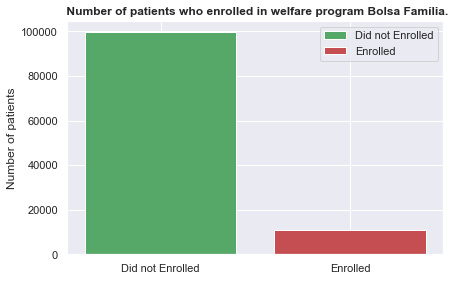

In [114]:
Chart_Bars(label1='Did not Enrolled', height1=scholar_value.values[0], label2='Enrolled',
           height2=scholar_value.values[1], Title=" Number of patients who enrolled in welfare program Bolsa Família.")

There are about 100,000 patients who did not enroll in the welfare program.

In [115]:
hyper_value = df['Hipertension'].value_counts()
hyper_value

0    88726
1    21801
Name: Hipertension, dtype: int64

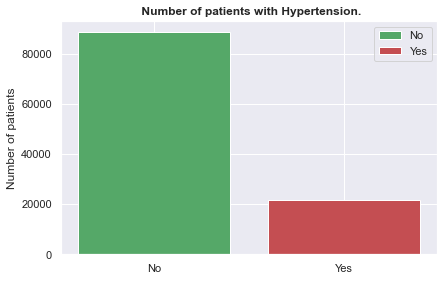

In [116]:
Chart_Bars(label1='No', height1=hyper_value.values[0], label2='Yes',
           height2=hyper_value.values[1], Title=" Number of patients with Hypertension.")

Fewer patients had hypertension compare to those who do not have'

In [117]:
diabetes_value = df['Diabetes'].value_counts()
diabetes_value

0    102584
1      7943
Name: Diabetes, dtype: int64

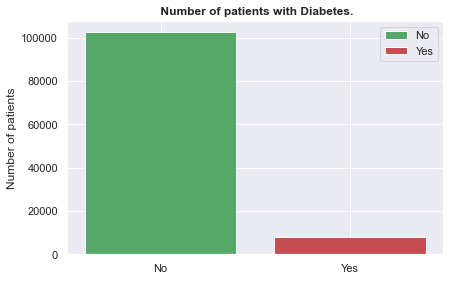

In [118]:
Chart_Bars(label1='No', height1=diabetes_value.values[0], label2='Yes',
           height2=diabetes_value.values[1], Title=" Number of patients with Diabetes.")

In [119]:
alcohol_value = df['Alcoholism'].value_counts()
alcohol_value

0    107167
1      3360
Name: Alcoholism, dtype: int64

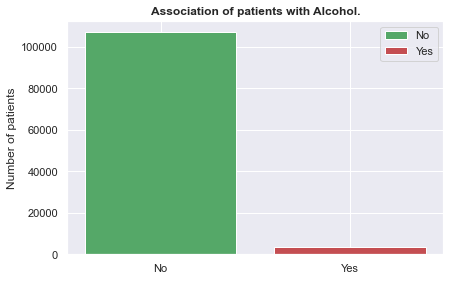

In [120]:
Chart_Bars(label1='No', height1=alcohol_value.values[0], label2='Yes',
           height2=alcohol_value.values[1], Title= "Association of patients with Alcohol.")

In [121]:
sms_value = df['SMS_received'].value_counts()
sms_value

0    75045
1    35482
Name: SMS_received, dtype: int64

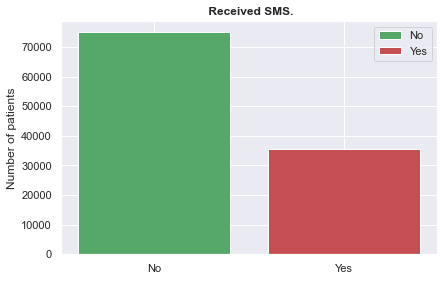

In [122]:
Chart_Bars(label1='No', height1=sms_value.values[0], label2='Yes',
           height2=sms_value.values[1], Title=" Received SMS.")

There are about 70,000 patients who did not receive SMS
About 35,000 patients received SMS

In [123]:
noshow_value = df['No-show'].value_counts()
noshow_value

No     88208
Yes    22319
Name: No-show, dtype: int64

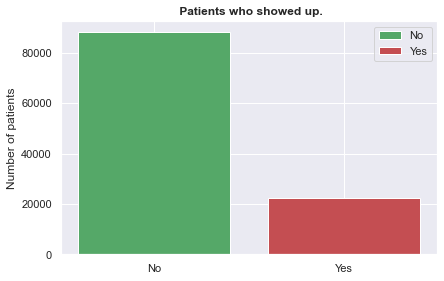

In [124]:
Chart_Bars(label1='No', height1=noshow_value.values[0], label2='Yes',
           height2=noshow_value.values[1], Title=" Patients who showed up.")

About 80% of the patients showed up

### Data Cleaning
Cleaning and Editing ScheduledDay & AppointmentDay columns
The two columns are in object format, converting into date format

In [125]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [126]:
Scheduled_Day = df['ScheduledDay'].dt.day_name()
df.insert(5,'Scheduled_Day',Scheduled_Day)

Appointment_Day = df['AppointmentDay'].dt.day_name()
df.insert(5,'Appointment_Day',Appointment_Day)

####  Cleaning/Editing No-show column

In [127]:
# changing the column name from NO-show to No_show'
df.rename(columns={'No-show': 'No_show'}, inplace=True)

In [128]:
# changing each No to 0 and Yes to 1
df['No_show'] = df['No_show'].apply(lambda val: 0 if val == 'No' else 1)

####  Cleaning and editing age column

In [129]:
# checking outliers of the ages after age of 100.
df.query('Age > 100').Age.value_counts()

115    5
102    2
Name: Age, dtype: int64

In [130]:
# Getting the above limit of ages.
Q1 = df.Age.describe()['25%']
Q3 = df.Age.describe()['75%']

IQR = Q3 - Q1
Max_Age = Q3 + (1.5 * IQR)

# The limit of ages to be considered anything above is OUTLIER.
Max_Age

110.5

In [131]:
# Ignoring patients who have   HightLimitOfAge < ages < 0.
maximum_age = df.Age.max()

df = df.query(f'Age >= 0 & Age <= {Max_Age}')

In [132]:
#df.tail()
df.query('Age > 99').Age.value_counts()

100    4
102    2
Name: Age, dtype: int64

In [133]:
# Grouping age column into the following ranges['0-5', '6-9', '10-17', '18-34', '35-54', '55-74', '74+']
labels = ['0-5', '6-9', '10-17', '18-34', '35-54', '55-74', '74+']
bins = [0, 5, 9, 17, 34, 54, 74, maximum_age]

Age_group = pd.cut(df['Age'], bins=bins, labels=labels)
df.insert(9, 'Age_group', Age_group)

#### Clean/editing Handcap column

In [134]:
# keeping only two values
df['Handcap'] = df['Handcap'].apply(lambda val: 1 if val >= 1 else 0)
df['Handcap'].value_counts()

0    108284
1      2237
Name: Handcap, dtype: int64

### Exploratory Data Analysis

#### Research Question 1: What is the most days for showing up and No-showing up?

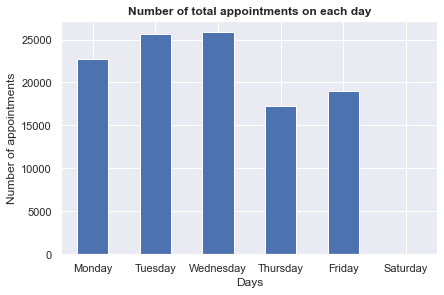

In [135]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

Total_appointments_Days = df.groupby('Appointment_Day')['PatientId'].count()[days]

Total_appointments_Days.plot(kind='bar')
plt.title('Number of total appointments on each day', fontweight='bold')
plt.ylabel('Number of appointments');
plt.xticks(rotation= 0);
plt.xlabel('Days');

The days most patient book appointment are in descending order wednesday,Tuesday,Monday.

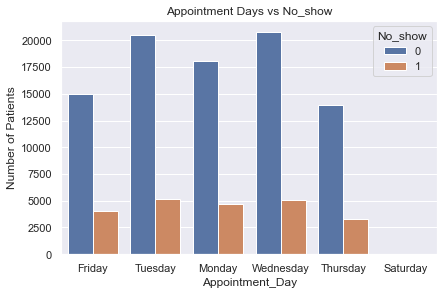

In [136]:
sns.countplot(x='Appointment_Day', hue='No_show', data=df)
plt.title("Appointment Days vs No_show")
plt.ylabel('Number of Patients')
plt.show()

It seems there are preferences in the days of appointments. 

#### Research Question 2:  Is there any relationship between showing up and the gender?

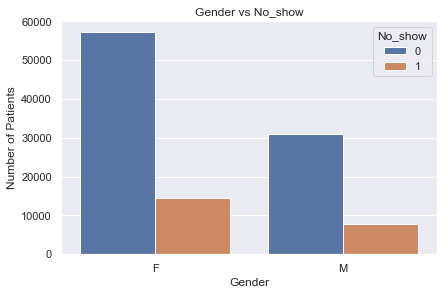

In [137]:
sns.countplot(x='Gender', hue='No_show', data=df)
plt.title("Gender vs No_show")
plt.ylabel('Number of Patients')
plt.show()

Half of the patient's population are females


####  Research Question 3: Is there any relationship between showing up and the Age?

C:\Users\udobo\anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


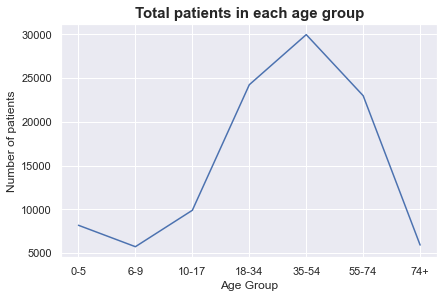

In [138]:
Total_patients_age_group = df.groupby('Age_group')['No_show'].count()

plt.plot(Total_patients_age_group);
plt.title('Total patients in each age group', fontsize=15, fontweight='bold');
plt.xlabel('Age Group', fontsize=12);
plt.ylabel('Number of patients', fontsize=12);

The age group that has the most number of patient are between 35 to 54 years

#### Research Question 4:  Does receiving messages affect showing up for the appointment?

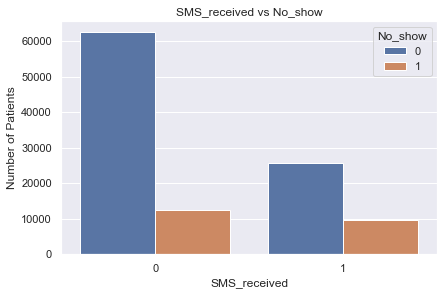

In [139]:
sns.countplot(x='SMS_received', hue='No_show', data=df)
plt.title("SMS_received vs No_show")
plt.ylabel('Number of Patients')
plt.show()

SMS received does not affect showing up

#### Research Question 5: Is there a relationship between diseases and showing up?

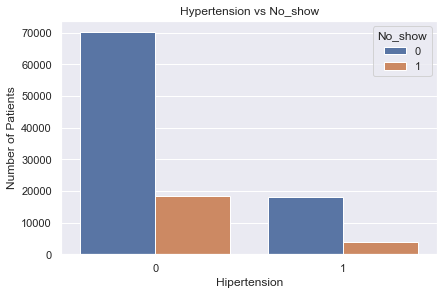

In [140]:
sns.countplot(x='Hipertension', hue='No_show', data=df)
plt.title("Hypertension vs No_show")
plt.ylabel('Number of Patients')
plt.show()

Fewer patients had Hypertension

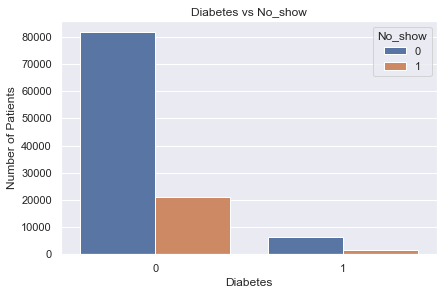

In [141]:
sns.countplot(x='Diabetes', hue='No_show', data=df)
plt.title("Diabetes vs No_show")
plt.ylabel('Number of Patients')
plt.show()

Very few patients had Diabetes and a greater number showed up 

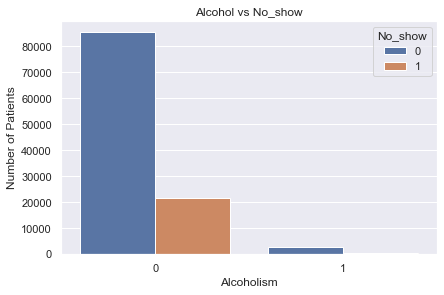

In [142]:
sns.countplot(x='Alcoholism', hue='No_show', data=df)
plt.title("Alcohol vs No_show")
plt.ylabel('Number of Patients')
plt.show()

It seems all patients associated with alcohol showed up

#### Research Question 6:  Does Enrollment in the Brasilian welfare program Bolsa Família affect showing up?

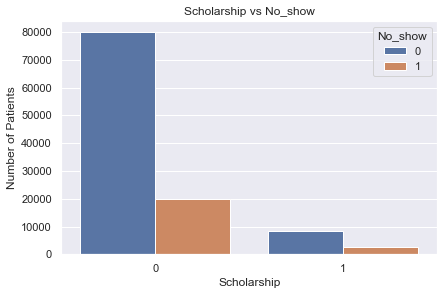

In [143]:
sns.countplot(x='Scholarship', hue='No_show', data=df)
plt.title("Scholarship vs No_show")
plt.ylabel('Number of Patients')
plt.show()

Most of the patients did not enroll in the scholarship program.

#### Research Question 7: Which hospital do patients visit most?

In [144]:
 most_visited_hospital = df['Neighbourhood'].value_counts()[0:5]

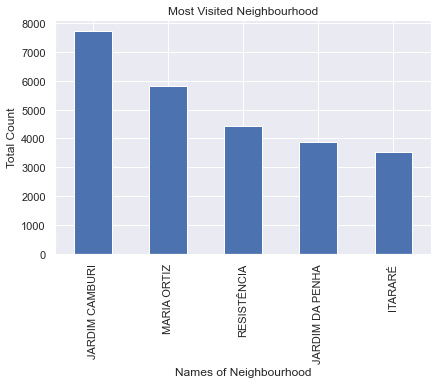

In [145]:
most_visited_hospital.plot(kind='bar')
plt.title("Most Visited Neighbourhood")
plt.ylabel("Total Count")
plt.xlabel("Names of Neighbourhood")
plt.show()

The two hospital with the highest number of visit are
* Jardim Camburi
* Maria Ortiz

Maybe they were the closest neighborhood

### Conclusion
1. There is no big difference in the distribution of Age between patients who showed up for the appointment versus the patients that did not show up for the appointment.
2. There is a higher percentage of people that received an SMS and did not show up when compared to people who received an SMS and did show up.
3. People that have a disease are 3% more likely to show up for the appointment than people who do not have a disease.
4. Handicap patients are more likely to show up for appointment compared to people who are not handicap. 
5. Being enrolled in the Scholarship program does not seem to make people more likely to show up for the appointments.



### Limitations 
1. Most of the variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations.
2. The statistics used are descriptive statistics not inferential, meaning that we did not create any hypotheses or controlled experiments or inferences with the data.
4. Cannot show strong correlations between factors since most of our data is categorical.
